# Homework 2: Decision Trees
Due 10/21 at 11:59pm

**Note: There are two notebooks in Homework 2. Please also complete the other notebook `HW2_Linear_Models.ipynb` for full credit on this assignment.**

### Q4 : Decision Trees

Download the dataset from this website : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
The data is a csv file with the following columns:

__age__: continuous.

__workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

__fnlwgt__: continuous.

__education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

__education-num__: continuous.

__marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

__occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

__relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

__race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

__sex__: Female, Male.

__capital-gain__: continuous.

__capital-loss__: continuous.

__hours-per-week__: continuous.

__native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

__target__: >50K, <=50K.

1. Read the data into a dataframe and assign column names

In [212]:
#code here
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country', 'target']

2. Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why?

In [213]:
#code here
import numpy as np

num_features = ['age', 
                'fnlwgt', 
                'education_num', 
                'capital_gain',
                'capital_loss',
                'hours_per_week']

none_prob = dict(zip(df.columns, [0]*len(df.columns)))

for (columnName, columnData) in df.iteritems():
    num = 0
    data = columnData.values
    
    if columnName in num_features:
        for i in data:
            if not isinstance(i, (int, np.integer)):
                num += 1
    else:
        if columnName == 'workclass':
            legal_value = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
        elif columnName == 'education':
            legal_value = ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool']
        elif columnName == 'marital_status':
            legal_value = ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
        elif columnName == 'occupation':
            legal_value = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
        elif columnName == 'relationship':
            legal_value = ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']
        elif columnName == 'race':
            legal_value = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
        elif columnName == 'sex':
            legal_value = ['Female', 'Male']
        elif columnName == 'native_country':
            legal_value = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']
        elif columnName == 'target':
            legal_value = ['>50K', '<=50K']  
            
        for i in data:
            i=i.replace(' ', '')
            if i not in legal_value:
                num += 1

    none_prob[columnName] = num/len(columnData)
    
print(none_prob)

{'age': 0.0, 'workclass': 0.05638647461687295, 'fnlwgt': 0.0, 'education': 0.0, 'education_num': 0.0, 'marital_status': 0.0, 'occupation': 0.056601455729246644, 'relationship': 0.0, 'race': 0.0, 'sex': 0.0, 'capital_gain': 0.0, 'capital_loss': 0.0, 'hours_per_week': 0.0, 'native_country': 0.0179048555019809, 'target': 0.0}


##### I will not drop any columns, since most values are not missing.
##### I will not consider impute the missing values. For 'workclass', 'occupation' and 'native_country', there are 8, 14, 41 different values expect for the missing one. We can treat missing value as a special type.

3. Pick 3 categorical features and for each categorical feature, plot side-by-side bars (horizontal or vertical) of class distribution for each category. 

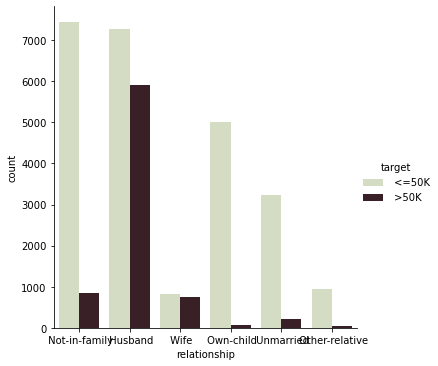

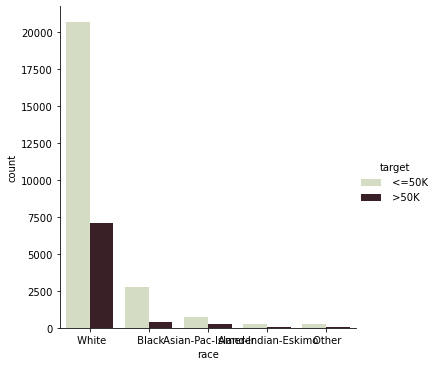

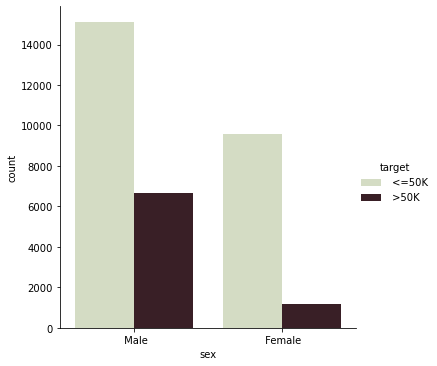

In [214]:
#code here
# sex, race, relationship
import seaborn as sns

sns.catplot(x="relationship", kind="count",hue="target", palette="ch:.6", data=df)
sns.catplot(x="race", kind="count",hue="target", palette="ch:.6", data=df)
sns.catplot(x="sex", kind="count",hue="target", palette="ch:.6", data=df)

4. Split the dataset into development and test datasets using 80/20 ratio

In [111]:
import pandas as pd
#code here

#%pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


# data preprocess 32561 × 15

# target process
df['target'] = np.where(df['target'].str.contains('>'), 1, 0)


# OHE 9+7+6+5+2=29
ohe_features = ['workclass', 'marital_status', 'relationship', 'race', 'sex']
df = df.join(pd.get_dummies(df['workclass']))
df = df.join(pd.get_dummies(df['marital_status']))
df = df.join(pd.get_dummies(df['relationship']))
df = df.join(pd.get_dummies(df['race']))
df = df.join(pd.get_dummies(df['sex']))

# data split
adult_X, adult_y = df.drop(columns=['target']), df['target']
dev_X, test_X, dev_y, test_y = train_test_split(adult_X, adult_y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(dev_X, dev_y, test_size=0.25, random_state=84)


# target encoder
train_X, val_X, test_X = train_X.copy(), val_X.copy(), test_X.copy()

tar_enc = TargetEncoder().fit(train_X['occupation'], train_y)
train_X['occupation_enc'] = tar_enc.transform(train_X['occupation'])
val_X['occupation_enc'] = tar_enc.transform(val_X['occupation'])
test_X['occupation_enc'] = tar_enc.transform(test_X['occupation'])

tar_enc = TargetEncoder().fit(train_X['native_country'], train_y)
train_X['native_country_enc'] = tar_enc.transform(train_X['native_country'])
val_X['native_country_enc'] = tar_enc.transform(val_X['native_country'])
test_X['native_country_enc'] = tar_enc.transform(test_X['native_country'])


# ordinal encoder
ord_enc = OrdinalEncoder(categories=[['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate']])

train_edu = train_X['education'].to_numpy().reshape(-1,1)
val_edu = val_X['education'].to_numpy().reshape(-1,1)
test_edu = test_X['education'].to_numpy().reshape(-1,1)

train_edu = np.array([i[0].replace(' ', '') for i in train_edu]).reshape(-1,1)
val_edu = np.array([i[0].replace(' ', '') for i in val_edu]).reshape(-1,1)
test_edu = np.array([i[0].replace(' ', '') for i in test_edu]).reshape(-1,1)

ord_enc = ord_enc.fit(train_edu)
train_X['education_enc'] = ord_enc.transform(train_edu)
val_X['education_enc'] = ord_enc.transform(val_edu)
test_X['education_enc'] = ord_enc.transform(test_edu)

train_X=train_X.drop(columns=['occupation','native_country','workclass','marital_status','relationship','race','sex','education'])
val_X=val_X.drop(columns=['occupation','native_country','workclass','marital_status','relationship','race','sex','education'])
test_X=test_X.drop(columns=['occupation','native_country','workclass','marital_status','relationship','race','sex','education'])

# dev 
dev_X = train_X.append(val_X, ignore_index=True)
dev_y = train_y.append(val_y, ignore_index=True)

5. Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on development data and test data?

In [112]:
#code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()

clf = clf.fit(dev_X, dev_y)
pred_dev = clf.predict(dev_X)
pred_test = clf.predict(test_X)

print("Development accuracy:", accuracy_score(pred_dev, dev_y))
print("Test accuracy:", accuracy_score(pred_test, test_y))

Development accuracy: 1.0
Test accuracy: 0.8180561953017043


6. Visualize the trained tree

[Text(697.5, 951.3000000000001, ' Married-civ-spouse <= 0.5\ngini = 0.365\nsamples = 19536\nvalue = [14844, 4692]'),
 Text(348.75, 679.5, 'capital_gain <= 7139.5\ngini = 0.119\nsamples = 10511\nvalue = [9843, 668]'),
 Text(174.375, 407.70000000000005, 'education_num <= 13.5\ngini = 0.09\nsamples = 10324\nvalue = [9835, 489]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.07\nsamples = 9772\nvalue = [9418, 354]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.37\nsamples = 552\nvalue = [417, 135]'),
 Text(523.125, 407.70000000000005, 'fnlwgt <= 25115.5\ngini = 0.082\nsamples = 187\nvalue = [8, 179]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.063\nsamples = 185\nvalue = [6, 179]'),
 Text(1046.25, 679.5, 'education_num <= 12.5\ngini = 0.494\nsamples = 9025\nvalue = [5001, 4024]'),
 Text(871.875, 407.70000000000005, 'capital_gain <= 5095.5\ngini = 0.442\nsamples = 6338\nvalue = [4249, 2089]'),
 Text(784.68

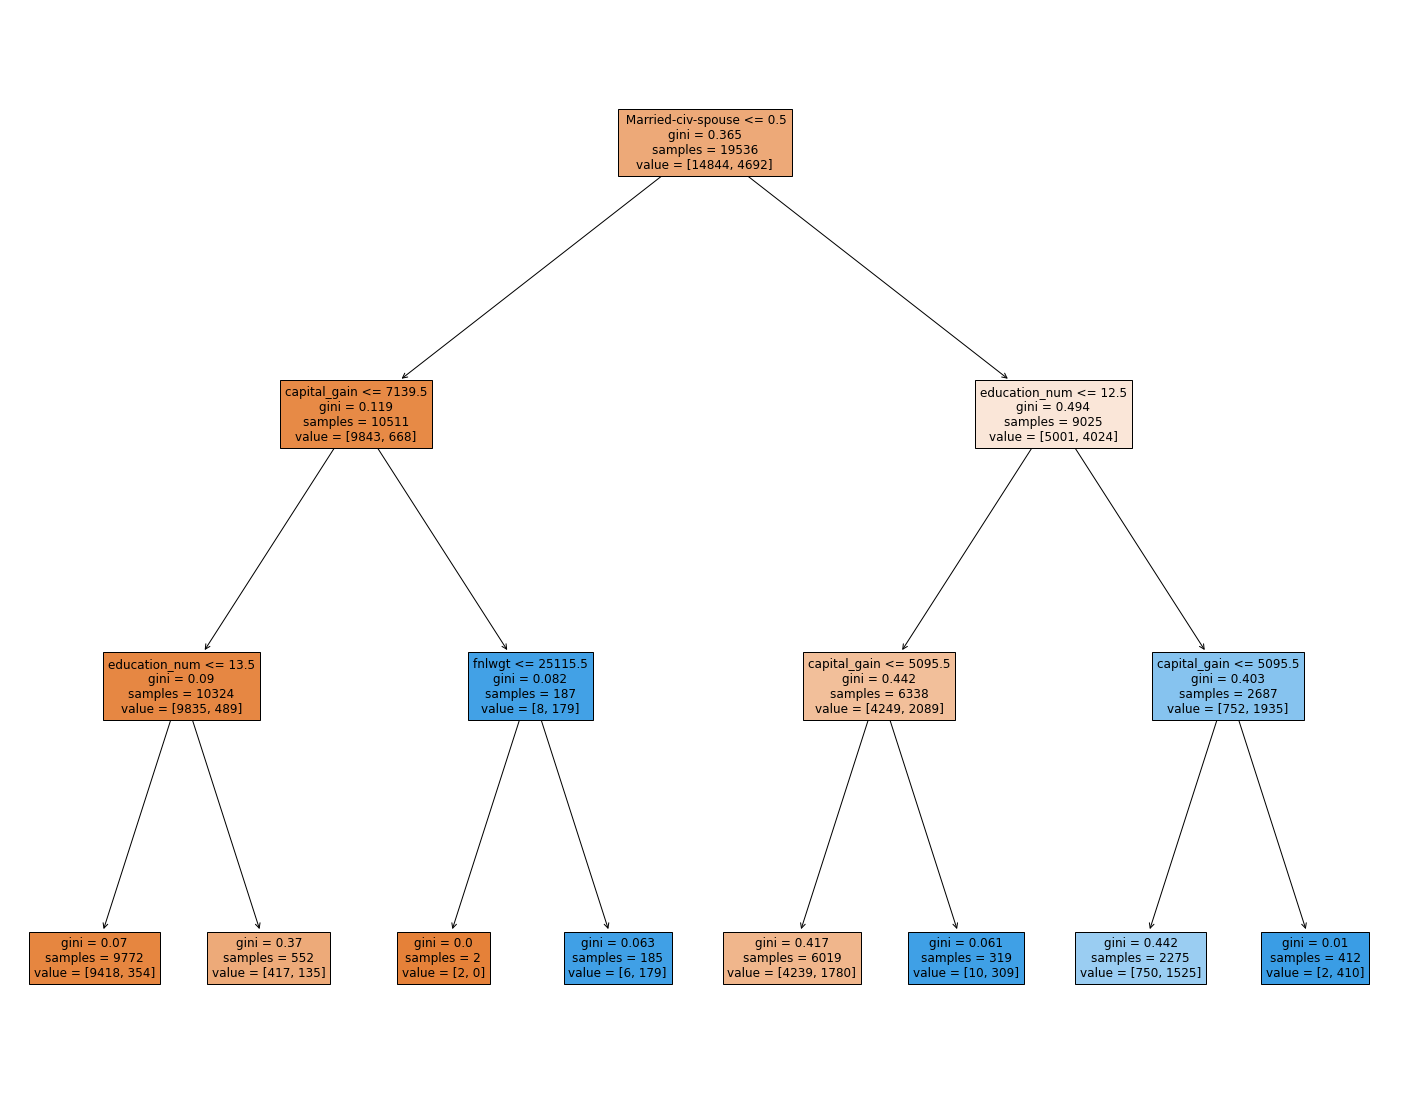

In [116]:
#code here
# import graphviz
from sklearn import tree
import matplotlib.pyplot as plt

small_clf = DecisionTreeClassifier(max_depth=3)
small_clf = small_clf.fit(train_X, train_y)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(small_clf, 
               feature_names=list(train_X.columns), 
               filled=True)

# text_representation = tree.export_text(small_clf, feature_names=list(train_X.columns))
# print(text_representation)


7. Prune the tree using one of the techniques discussed in class and evaluate the performance on the test set again.

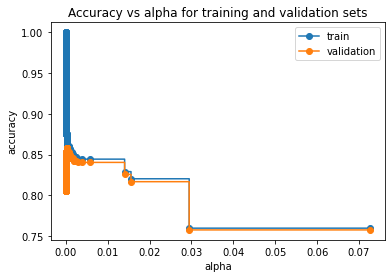

In [119]:
#code here
#You should pick one of reduced error or cost complexity for this problem.
path = clf.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas=path.ccp_alphas
clfs = []

# find the 'max_depth'
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_X, train_y)
    clfs.append(clf)
    
train_scores = [clf.score(train_X, train_y) for clf in clfs]
val_scores = [clf.score(val_X, val_y) for clf in clfs]
test_scores = [clf.score(test_X, test_y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [120]:
print("Best val score:", max(val_scores))
print("Best alpha:", path.ccp_alphas[val_scores.index(max(val_scores))])
print("Test score:", test_scores[val_scores.index(max(val_scores))])

Best val score: 0.8582616707616708
Best alpha: 0.0002054977162843077
Test score: 0.8608935974205435


8. List the top 3 most important features for this trained tree? How would you justify these features being the most important? 

In [126]:
#code here
# marital-status, capital-gain, education-num
importance = list(clf.feature_importances_)
all_features = list(dev_X.columns)

pos1 = max(importance) 
feature1 = all_features[importance.index(pos1)]
importance.remove(pos1)
all_features.remove(feature1)

pos2 = max(importance)
feature2 = all_features[importance.index(pos2)]
importance.remove(pos2)
all_features.remove(feature2)

pos3 = max(importance)
feature3 = all_features[importance.index(pos3)]

print("Three parameters I would choose are:", feature1,feature2,feature3)
print("We get this from features' importance order.")

Three parameters I would choose are: age fnlwgt education_num
We get this from features' importance order.


### Q5: Random Forests

Let's use the same dataset and the splits created in Q3.

1. Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 4.5)?

In [127]:
#code here
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(dev_X, dev_y)
pred_test = rf_clf.predict(test_X)
print("Test accuracy:", accuracy_score(pred_test, test_y))

Test accuracy: 0.8621219100261016


##### Random Forest model performs better than Decision Tree on the test dataset.

2. Does all trees in the trained random forest model have pure leaves? How would you verify this?

##### ANSWER: all trees in the trained random forest model have pure leaves, since the parameters we use default values for RandomForestClassifier - nodes are expanded until all leaves are pure. We can verify it by testing its performance on the dev data. 

In [128]:
#code here
pred_dev = rf_clf.predict(dev_X)
print("Test accuracy on development data:", accuracy_score(pred_dev, dev_y))

Test accuracy on development data: 1.0


##### From the test accuracy on the development data , we can conclude that all trees in the trained random forest model have pure leaves. 

3. Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?

In [217]:
#code here
print("choose # of trees: n_estimators and max_features for each decision tree")

choose # of trees: n_estimators and max_features for each decision tree


4. Now, assume you had to choose upto 10 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift? 

In [215]:
#code here
n_estimators = [int(x) for x in np.linspace(1, 20, num = 10)]
max_features = [int(x) for x in np.linspace(5, 25, num = 10)]

5. Perform model selection using the chosen values for the hyperparameters. Select 3 values for each of the hyperparameters and use cross-validation to find the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q5.1?

In [216]:
#code here
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

estimators = random.sample(n_estimators, 3)
features = random.sample(max_features, 3)

# model selection - cross validation to find the best optimal hyperparameters
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
val_results, test_results, importance = list(), list(), list()
np_dev_X, np_dev_y, np_test_X, np_test_y = dev_X.to_numpy(), dev_y.to_numpy(), test_X.to_numpy(), test_y.to_numpy()

for train_ix, val_ix in cv_outer.split(dev_X):
    # split data
    X_train, X_val = np_dev_X[train_ix], np_dev_X[val_ix]
    y_train, y_val = np_dev_y[train_ix], np_dev_y[val_ix]
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = estimators
    space['max_features'] = features
    # define search
    search = GridSearchCV(model, space)#, scoring='accuracy', cv=cv_inner, refit=True)
    result = search.fit(X_train, y_train)
    best_model = result.best_estimator_
    
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_val)
    acc = accuracy_score(y_val, yhat)
    if len(val_results)==0 or acc>max(val_results):
        importance = list(best_model.feature_importances_)
    val_results.append(acc)
    
    test_acc = accuracy_score(np_test_y, best_model.predict(np_test_X))
    test_results.append(test_acc)
    
print('val scores:', val_results)
print('test results:', test_results)

result = test_results[val_results.index(max(val_results))]
print('Performance of best model on test set:', result)

val scores: [0.8452975047984644, 0.8537428023032629, 0.8537428023032629, 0.8522072936660269, 0.8491362763915548, 0.8472168905950096, 0.8418426103646833, 0.8426103646833013, 0.8582949308755761, 0.8475422427035331]
test results: [0.8565945033010901, 0.8539843390142792, 0.8561338860740059, 0.857362198679564, 0.8555197297712268, 0.8529095654844158, 0.8582834331337326, 0.8598188238906802, 0.8527560264087211, 0.8552126516198373]
Performance of best model on test set: 0.8527560264087211


##### ANSWER: this does not improve over the plain-vanilla random forest model trained in Q5.1.

6. Can you find the top 3 most important features from the model trained in Q5.5? How do these features compare to the important features that you found from Q4.8? If they differ, which feature set makes more sense?

In [161]:
#code here
all_features = list(dev_X.columns)

pos1 = max(importance) 
feature1 = all_features[importance.index(pos1)]
importance.remove(pos1)
all_features.remove(feature1)

pos2 = max(importance)
feature2 = all_features[importance.index(pos2)]
importance.remove(pos2)
all_features.remove(feature2)

pos3 = max(importance)
feature3 = all_features[importance.index(pos3)]

print("The top 3 most importance features from Q5.5 are:", feature1,feature2,feature3)

The top 3 most importance features from Q5.5 are: fnlwgt age  Married-civ-spouse


##### ANSWER: the features(fnlwgt age  Married-civ-spouse) are different from those of Q4.8 (age fnlwgt education_num). The set generated here makes more sense.

### Q6: Gradient Boosted Trees

Let's use the same dataset and the splits created in Q3.

1. Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 10-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.

In [200]:
#code here
# # of estimators, lr, 
import timeit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier


######################################################
# GradientBoostingClassifier
######################################################
parameters = {
    "n_estimators": [5, 20, 50],
    "max_depth":[5, 10, 20],
    "learning_rate":[0.01, 0.1, 1]
}
gbc_start = timeit.default_timer()
tuning = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10), param_grid = parameters, scoring='accuracy', cv=10)
tuning.fit(dev_X, dev_y)
gbc_end = timeit.default_timer()

#print(tuning.cv_results_, tuning.best_params_, tuning.best_score_)
print('*'*20, 'GradientBoostingClassifier','*'*20)
print(tuning.best_params_)
print("Time:", gbc_end-gbc_start)

classifier = GradientBoostingClassifier(n_estimators=tuning.best_params_['n_estimators'], max_depth=tuning.best_params_['max_depth'], learning_rate=tuning.best_params_['learning_rate'])
classifier.fit(dev_X, dev_y)
pred_test = classifier.predict(test_X)
print("Test score:", accuracy_score(pred_test, test_y))


######################################################
# HistGradientBoostingClassifier
######################################################
parameters = {
    "max_leaf_nodes": [10, 20, 50],
    "max_depth":[5, 10, 20],
    "learning_rate":[0.01, 0.1, 1]
}

hgbc_start = timeit.default_timer()
tuning = GridSearchCV(estimator = HistGradientBoostingClassifier(random_state=10), param_grid = parameters, scoring='accuracy', cv=10)
tuning.fit(dev_X, dev_y)
hgbc_end = timeit.default_timer()

# print(tuning.grid_results_, tuning.best_params_, tuning.best_score_)
print('*'*20, 'HistGradientBoostingClassifier','*'*20)
print(tuning.best_params_)
print("Time:,", hgbc_end-hgbc_start)

classifier = HistGradientBoostingClassifier(max_leaf_nodes=tuning.best_params_['max_leaf_nodes'], max_depth=tuning.best_params_['max_depth'], learning_rate=tuning.best_params_['learning_rate'])
classifier.fit(dev_X, dev_y)
pred_test = classifier.predict(test_X)
print("Test score:", accuracy_score(pred_test, test_y))

******************** GradientBoostingClassifier ********************
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Time: 730.4042745000006
Test score: 0.8757868877629357
******************** HistGradientBoostingClassifier ********************
{'learning_rate': 0.1, 'max_depth': 10, 'max_leaf_nodes': 20}
Time:, 134.98204383300254
Test score: 0.8797789037309995


2. Train an XGBoost model by tuning 3 hyperparameters using cross-validation. Report on the optimal hyperparameters and the time to train the model. Compare the performance of the trained XGBoost model on test dataset against the performances obtained from 6.1 

In [201]:
#code here
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV

params = {
    'max_depth':[5, 10, 15],
    'gamma': [0.1, 0.5, 1],
    'learning_rate': [0.01, 0.1],
    'eval_metric': ['logloss'],
    'verbose': [0]
}

xgbc_start = timeit.default_timer()
tuning = GridSearchCV(estimator = XGBClassifier(verbosity=0), param_grid = params, scoring='accuracy', cv=10, verbose=0)
tuning.fit(dev_X, dev_y, verbose=0)
xgbc_end = timeit.default_timer()

print('*'*20, 'XGBoostClassifier','*'*20)
print(tuning.best_params_)
print("Time:,", xgbc_end-xgbc_start)

classifier = XGBClassifier(max_depth=tuning.best_params_['max_depth'], 
                           gamma=tuning.best_params_['gamma'], 
                           learning_rate=tuning.best_params_['learning_rate'], 
                           eval_metric=tuning.best_params_['eval_metric'],
                           verbosity = 0)
classifier.fit(dev_X, dev_y, verbose=0)
pred_test = classifier.predict(test_X)
print("Test score:", accuracy_score(pred_test, test_y))

******************** XGBoostClassifier ********************
{'eval_metric': 'logloss', 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'verbose': 0}
Time:, 434.4517847909956
Test score: 0.876861661292799


##### The test accuracy is near to Q6.1

3. Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q4.5 and Q5.5. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?

In [218]:
#code here
print("best: HistGradientBoostingClassifier, worst: DecisionTreeClassifier")
print("difference:", 0.8797789037309995-0.8180561953017043)
print("I would choose HistGradientBoostingClassifier because of its high accuracy and less training time")

best: HistGradientBoostingClassifier, worst: DecisionTreeClassifier
difference: 0.06172270842929528
I would choose HistGradientBoostingClassifier because of its high accuracy and less training time


4. Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?

In [166]:
#code here
importance = list(classifier.feature_importances_)
all_features = list(dev_X.columns)

pos1 = max(importance) 
feature1 = all_features[importance.index(pos1)]
importance.remove(pos1)
all_features.remove(feature1)

pos2 = max(importance)
feature2 = all_features[importance.index(pos2)]
importance.remove(pos2)
all_features.remove(feature2)

pos3 = max(importance)
feature3 = all_features[importance.index(pos3)]

print("The top 3 most importance features from XGBoost model are:", feature1,feature2,feature3)

The top 3 most importance features from XGBoost model are:  Married-civ-spouse education_num capital_gain


##### Random Forest: fnlwgt age  Married-civ-spouse 
##### Decision Tree: age fnlwgt education_num
##### XGBoost: Married-civ-spouse education_num capital_gain
##### I would trust the one generated from XGBoost

5. Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q6.2? Does this model perform better than the one trained in Q6.2? Why or why not is the performance better?

In [194]:
#code here
importance = list(classifier.feature_importances_)
all_features = list(dev_X.columns)
top_7 = []

for i in range(7):
    pos = max(importance) 
    feature = all_features[importance.index(pos)]
    importance.remove(pos)
    all_features.remove(feature)
    top_7.append(feature)

print("The top 7 most importance features from XGBoost model are:", top_7)

The top 7 most importance features from XGBoost model are: [' Married-civ-spouse', 'education_num', 'capital_gain', ' Own-child', 'occupation_enc', 'capital_loss', 'age']


In [199]:
######################################################
# Repeat 6.2
######################################################

from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV

params = {
    'max_depth':[6],
    'gamma': [0.1],
    'learning_rate': [0.1],
    'eval_metric': ['logloss'],
    'verbose': [0]
}


short_dev_X = dev_X[[' Married-civ-spouse', 'education_num', 'capital_gain', ' Own-child', 'occupation_enc', 'capital_loss', 'age']]
short_dev_y = dev_y
short_test_X = test_X[[' Married-civ-spouse', 'education_num', 'capital_gain', ' Own-child', 'occupation_enc', 'capital_loss', 'age']]

xgbc_start = timeit.default_timer()
tuning = GridSearchCV(estimator = XGBClassifier(verbosity=0), param_grid = params, scoring='accuracy', cv=10, verbose=0)
tuning.fit(short_dev_X, short_dev_y, verbose=0)
xgbc_end = timeit.default_timer()

print('*'*20, 'XGBoostClassifier','*'*20)
print(tuning.best_params_)
print("Time:,", xgbc_end-xgbc_start)

short_classifier = XGBClassifier(max_depth=tuning.best_params_['max_depth'], 
                               gamma=tuning.best_params_['gamma'], 
                               learning_rate=tuning.best_params_['learning_rate'], 
                               eval_metric=tuning.best_params_['eval_metric'],
                               verbosity = 0)
short_classifier.fit(short_dev_X, short_dev_y, verbose=0)
pred_test = short_classifier.predict(short_test_X)
print("Test score:", accuracy_score(pred_test, test_y))

******************** XGBoostClassifier ********************
{'eval_metric': 'logloss', 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'verbose': 0}
Time:, 6.193466917000478
Test score: 0.8731767234761246


### Q7: Calibration

Let's use the same dataset and the splits created in Q3. Let's use the XGBoost model that you trained in Q6.2. 

1. Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q6.2) scored on the test dataset. 

In [168]:
#code here
from sklearn.metrics import brier_score_loss
print("brier score for the XGBoost model in Q6.2:", brier_score_loss(test_y, pred_test))

brier score for the XGBoost model in Q6.2: 0.12098879164747428


2. Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods

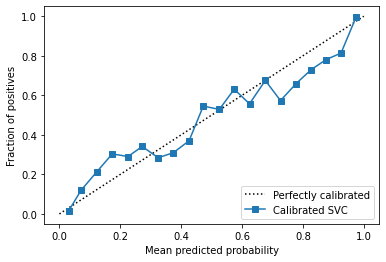

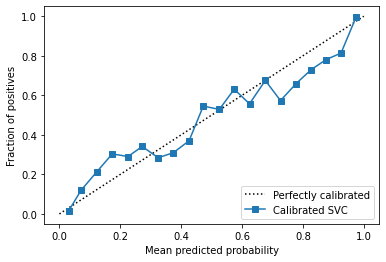

In [174]:
#code here
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

train_X, calib_X, train_y, calib_y = train_test_split(dev_X, dev_y, test_size=0.2, random_state=128)

####### Isotonic scaling 
cal_svc_iso = CalibratedClassifierCV(classifier, cv='prefit', method="isotonic")
cal_svc_iso.fit(calib_X, calib_y)
display = CalibrationDisplay.from_estimator(cal_svc, test_X, test_y, n_bins=20, name='Calibrated SVC')


####### Platt scaling 
cal_svc_plt = CalibratedClassifierCV(classifier, cv='prefit', method="sigmoid")
cal_svc_plt.fit(calib_X, calib_y)
display = CalibrationDisplay.from_estimator(cal_svc, test_X, test_y, n_bins=20, name='Calibrated SVC')

3. Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?

In [187]:
#code here
print("brier score for the XGBoost model in Q6.2:", brier_score_loss(test_y, cal_svc_iso.predict(test_X)))
print("brier score for the XGBoost model in Q6.2:", brier_score_loss(test_y, cal_svc_plt.predict(test_X)))

brier score for the XGBoost model in Q6.2: 0.11991401811761093
brier score for the XGBoost model in Q6.2: 0.12068171349608475


##### ANSWER: Both of them help in having better predicted probabilities(less brier scores).